İkinci proje olan regresyon projesinde ve üçüncü proje olan sınıflandırma projesinde kullandığınız veri kümelerini tekrar kullanarak, karar ağaçları ile regresyon ve sınıflandırma modelleri oluşturun ve bu modeller için en uygun parametre değerlerini belirleyin. En ideal parametreyi bulmak için daha önceki bölümde öğrendiğiniz çapraz doğrulama metodlarını kullanabilirsiniz.

# Classification with Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('titanic_train.csv')

In [2]:
train_data['is_male'] = pd.get_dummies(train_data['Sex'],drop_first = True)
train_data.drop(labels='Sex', axis=1, inplace=True)  

# C = Cherbourg
# S = Southampton
# Q = Queenstown
train_data.Embarked = train_data.Embarked.replace('C', 1)
train_data.Embarked = train_data.Embarked.replace('Q', 2)
train_data.Embarked = train_data.Embarked.replace('S', 3)
train_data.Embarked = train_data.Embarked.replace(np.nan, 0)

train_data.dropna(subset=['Age'], how='all', inplace=True)

In [3]:
df = train_data[['Pclass','is_male','Age','Fare','Embarked','Survived']]

In [4]:
df

,Pclass,is_male,Age,Fare,Embarked,Survived
0,3,1,22.0,7.2500,3.0,0
1,1,0,38.0,71.2833,1.0,1
2,3,0,26.0,7.9250,3.0,1
3,1,0,35.0,53.1000,3.0,1
4,3,1,35.0,8.0500,3.0,0
...,...,...,...,...,...,...
885,3,0,39.0,29.1250,2.0,0
886,2,1,27.0,13.0000,3.0,0
887,1,0,19.0,30.0000,3.0,1
889,1,1,26.0,30.0000,1.0,1


In [5]:
X = df[['Pclass','is_male','Age','Fare','Embarked']]
y = df['Survived']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rastgele_orman = RandomForestClassifier(n_estimators=25, random_state=2)
rastgele_orman.fit(X_eğitim, y_eğitim) 

RandomForestClassifier(n_estimators=25, random_state=2)

In [9]:
from sklearn.metrics import accuracy_score
y_tahmin_ro = rastgele_orman.predict(X_test)
print("Rastgele Orman Doğruluk Değeri : {:.2f}".format(accuracy_score(y_test, y_tahmin_ro)))

Rastgele Orman Doğruluk Değeri : 0.79


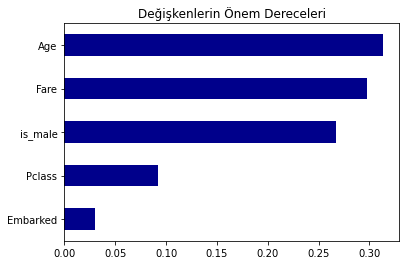

In [10]:
önem_dereceleri = pd.Series(data=rastgele_orman.feature_importances_,
                        index= X_eğitim.columns)

önem_dereceleri_sıralı = önem_dereceleri.sort_values()

önem_dereceleri_sıralı.plot(kind='barh', color='darkblue')
plt.title('Değişkenlerin Önem Dereceleri')
plt.show()

# Regression with Random Forest

In [13]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")

In [14]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

houseprices_df = house_prices_df.interpolate(method ='linear', limit_direction ='forward')

df_prices = houseprices_df.filter(['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea','YearBuilt','SalePrice'], axis=1)

# Y is the target variable
y1 = df_prices['SalePrice']
# X is the feature set
X1 = df_prices[['OverallQual','TotalBsmtSF','GrLivArea','GarageCars']]

In [15]:
X_train, X_test, y_train, y_test =  train_test_split(X1, y1, test_size=0.20, random_state=111)

In [16]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=25, random_state=2)
random_forest.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [17]:
from sklearn.metrics import mean_squared_error as MSE
y_prediction = random_forest.predict(X_test)
rmse_test = MSE(y_test, y_prediction)**(1/2)
print("RMSE value (Random Forest): {:.2f}".format(rmse_test))

RMSE value (Random Forest): 35095.00


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [19]:
from sklearn.metrics import mean_squared_error as MSE
y_predict = dt_reg.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)

# Print rmse_dt
print("RMSE Value of the Decision Tree : {:.2f}".format(rmse_ka))

RMSE Value of the Decision Tree : 40842.91


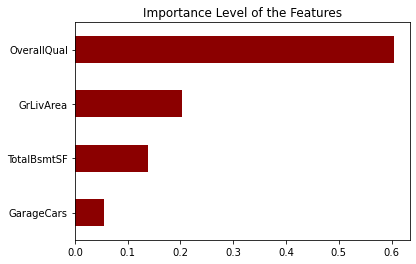

In [20]:
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()